In [1]:
from matplotlib import pyplot as plt # We need this package to plot figures.
import numpy as np
from scipy.linalg import expm # This is the "exponential of an operator" function
from scipy.integrate import odeint

In [ ]:
def flow(f,M,t,args=None):
    l1,h1,n1,l2,h2,n2=M
    T=np.linspace(0,t,1000)
    X0=np.linspace(l1,h1,n1)
    Y0=np.linspace(l2,h2,n2)

    for i in range(n1):
        for j in range(n2):
            U0=[X0[i],Y0[j]]
            solQ1=odeint(f,U0,T,(args,))
            plt.scatter(X0[i],Y0[j],color='blue',s=0.1)
            plt.plot(solQ1[:,0],solQ1[:,1],'r',linewidth=0.25)  
    return X0,Y0 ,T   

In [2]:
def Q1(u,t,args):
    x,y = u
    return [x,x+y]

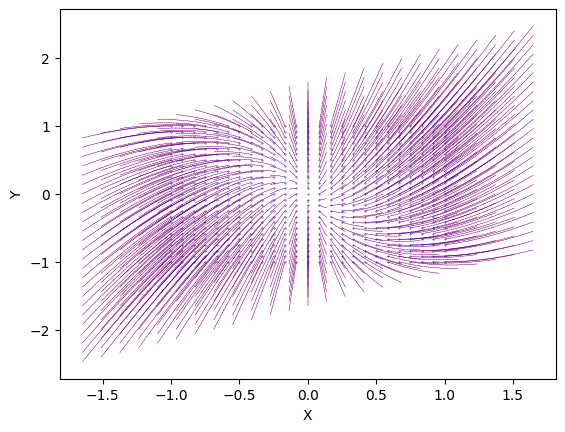

In [9]:
plt.xlabel('X')
plt.ylabel('Y')
X0,Y0,T=flow(Q1,(-1,1,25,-1,1,25),0.5)
#Analytic solution in blue
for i in range(25):
        for j in range(25):
            c2=X0[i]
            c1=Y0[j]-c2
            
            plt.plot(c2*np.exp(T),c1*np.exp(T)+(c2*(T+1)*np.exp(T)),'b--',linewidth=0.25)
        
plt.show()

In [3]:
def Q2(u,t,args):
    x,y = u
    return [-y,-x]

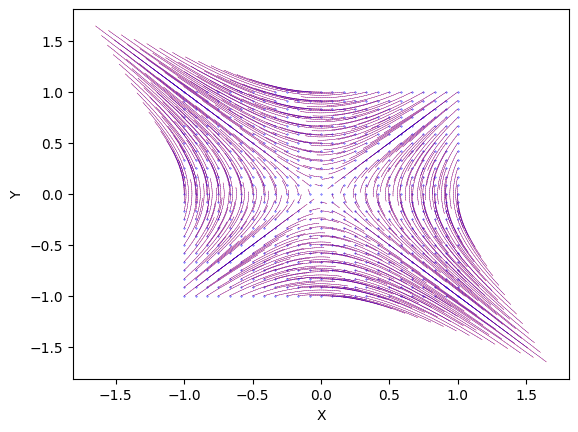

In [10]:
plt.xlabel('X')
plt.ylabel('Y')
X0,Y0,T=flow(Q2,(-1,1,25,-1,1,25),0.5)
#Analytic solution in blue
for i in range(25):
        for j in range(25):
            c1=0.5*(X0[i]-Y0[j])
            c2=0.5*(X0[i]+Y0[j])
            
            plt.plot(c1*np.exp(T)+c2*np.exp(-1*T),-1*c1*np.exp(T) + c2*np.exp(-1*T),'b--',linewidth=0.25)
        
plt.show()

In [4]:
def Q3(u,t,args):
    x,y = u
    return [x-y,x+y]

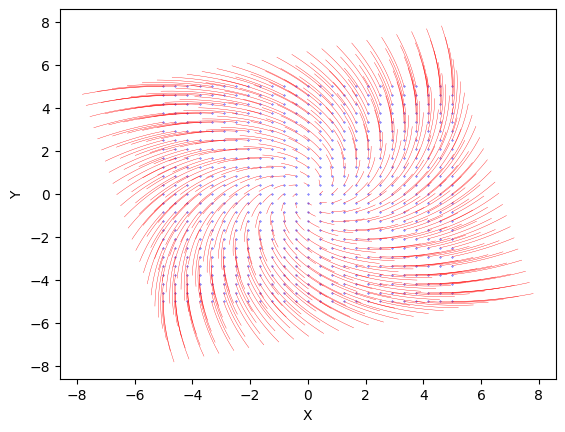

In [11]:
plt.xlabel('X')
plt.ylabel('Y')
flow(Q3,(-5,5,25,-5,5,25),0.25)

plt.show()

In [5]:
def pendulum(u,t,w):
    x,y = u
    return [y,-1* w**2 *np.sin(x)]

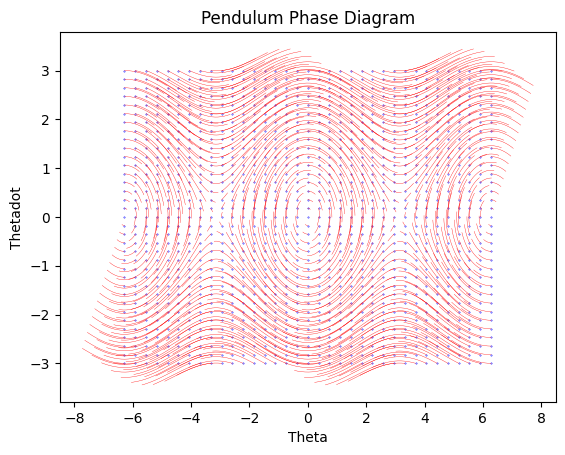

In [12]:
plt.xlabel('Theta')
plt.ylabel('Thetadot')
plt.title("Pendulum Phase Diagram")
flow(pendulum,(-2*3.14,2*3.14,35,-3,3,35),0.5,1)
plt.show()

In [6]:
def pendulum_small_angle(u,t,w):
    x,y = u
    return [y,-1* w**2 *x]

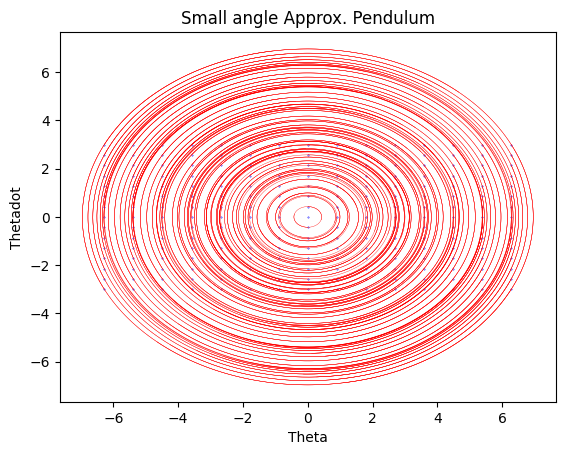

In [13]:
plt.xlabel('Theta')
plt.ylabel('Thetadot')
plt.title('Small angle Approx. Pendulum')
flow(pendulum_small_angle,(-2*3.14,2*3.14,15,-3,3,15),5,1)
plt.show()